## Sideline Demo Notebook

Hello! Thank you for helping us evaluate the concept of subplots in computational notebooks (like this one!)  

Try clicking the buttons next to the cell below saying `"sideline - link to subplot 1"` to hide or highlight the subplot on the right.  

sideline - link to subplot 1

Following are some tasks you can solve that demonstrate the use cases of subplots:

In [1]:
# imports
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import pi

%matplotlib inline
plt.rcParams['figure.figsize'] = 8,6

data = pd.read_excel("example_data/USDA_Food_Database.xlsx")

sideline - link to subplot 2

##### This subplot contains functions used to plot the following radar charts.

By the way, subplots tags (auto-generated numbers by default) can be customized using View > Cell Toolbar > Tags. The required format is "subplot-\<tag>" (for an example see the next subplot).  

Also, as you may have noticed, these referencing cells can be edited to contain whatever exposition you may want. The only limitation is that the first line must fit the specified format, like in this cell.


In [3]:
df2 = data.drop(['No', 'Keyword', 'Name'], inplace = False, axis=1)

df3 = data.groupby('Keyword')[df2.columns].mean() #use df2.columns to exclude No, Name
df3.dropna(inplace=True)
df3 = df3[df3.mean().sort_values().index] #sort ascending to split later, try to keep similar magnitude numbers together

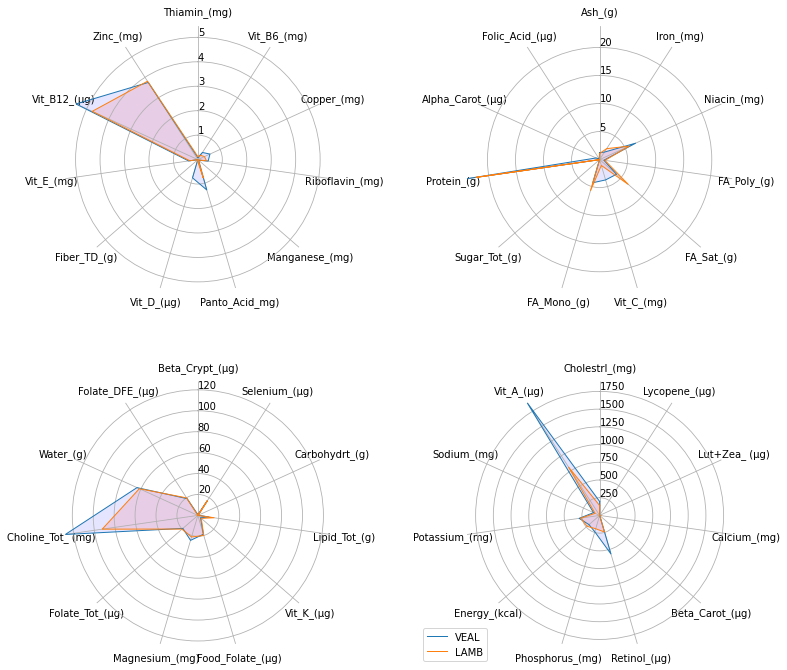

In [4]:
radar_charts(get_by_groups(df3, 'VEAL', 'LAMB'))

### I am a subplot!

I can contain code for exploration, data cleaning or other tasks that may be necessary or interesting, but I am probably not as important as the narrative this notebook is trying to tell.

Cells belonging to a subplot will be executed directly after the referencing cell in the main narrative (the left side) is executed. All remaining subplots (and the cells they contain) are executed AFTER the main narrative.  
  
If you are done with this introductory subplot, you can collapse it using the toggle button next to referencing cell on the left. Or, you can collapse ("hide") all subplots and show a "normal" notebook layout with the 👁️ button this extension added in the toolbar above.

In [2]:
def radar_charts(dflist):
    fig = plt.figure(figsize=(12,12))
    for i in range(0,len(dflist)):
        dfs = dflist[i]

        # ------- PART 1: Create background
     
        # number of variable
        categories=list(dfs)[1:]
        N = len(categories)
        
        # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]
     
        # Initialise the spider plot
        ax = plt.subplot(2,2,i+1, polar=True)
        plt.subplots_adjust(wspace=0.5)
     
        # If you want the first axis to be on top:
        ax.set_theta_offset(pi / 2)
        ax.set_theta_direction(-1)
        ax.spines['polar'].set_visible(False)
     
        # Draw one axe per variable + add labels labels yet
        plt.xticks(angles[:-1], categories)
     
        # Draw ylabels
        ax.set_rlabel_position(0)
        #plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
        plt.ylim(0,max(dflist[i].select_dtypes(include=[np.number]).max()))
     
     
        # ------- PART 2: Add plots
     
        # Plot each individual = each line of the data
        # I don't do a loop, because plotting more than 3 groups makes the chart unreadable
     
        # Ind1
        values=dfs.loc[0].drop('Keyword').values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=dfs.loc[0, 'Keyword'])
        ax.fill(angles, values, 'b', alpha=0.1)
         
        # Ind2
        values=dfs.loc[1].drop('Keyword').values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=dfs.loc[1, 'Keyword'])
        ax.fill(angles, values, 'r', alpha=0.1)
         
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    #return fig #if we return the fig, plot is printed into output twice
    
def get_by_groups(data, str1, str2):
    res = data.loc[[str1, str2]]
    res = np.split(res, 4, axis=1)
    np.array([xi.reset_index(inplace=True) for xi in res])
    return res